In [74]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

In [75]:
import imageio as iio
from skimage import color, transform

In [76]:
from PIL import Image

rgb_img = iio.v2.imread('Unicaen’s phoenix.jpg')

#im = color.rgb2gray(rgb_img)

#% Load a real image
#x_true = Image.open('Unicaen’s phoenix.png')
#x_true = Image.rgb2gray(x_true)

#%It uses the hue-saturation-value (HSV) colour model, where the hue represents the phase, the saturation represents the modulus
#% Convert the image to HSV
HSV = color.rgb2hsv(rgb_img)
H = HSV[:, :, 0]
S = HSV[:, :, 1]
V = HSV[:, :, 2]
(N3, N1) = S.shape

S_ext = np.zeros((N3 + 2 * int(N3/10),N1 + 2 * int(N1/10)))
H_ext = S_ext.copy() #to save the right extension S_ext. Else,  it seems to change the matrix S_ext
(N3e, N1e) = S_ext.shape

S_ext[int(N3/10):N3e - int(N3/10),int(N1/10): N1e - int(N1/10)] =  S #2 * np.ones((int(8 * N3/10),int(8 * N1/10)))

#plt.imshow(S_ext)
H_ext[int(N3/10):N3e - int(N3/10),int(N1/10): N1e - int(N1/10)] =  H #2 * np.ones((int(8 * N3/10),int(8 * N1/10)))

#iio.imwrite('Unicaen’s phoenix.jpg', x_true)
#x_true = transform.resize(x_true, (Nx,Ny))
#x_true /= np.max(x_true)
'''
# Spatial coordinates
radius = 4e-0
x1 = np.linspace(-5e-0, 5e-0, N1)
x3 = np.linspace(-5e-0, 5e-0, N3)
[X1, X3] = np.meshgrid(x1, x3)
cut_off = (np.sqrt(X1**2 + X3**2) < radius)


print(cut_off)
S = S * cut_off
H = H * cut_off
'''
#plt.imshow(S_ext)

# Define the complex image using S and H
image = S_ext * np.exp(1j * 2 * H_ext) 
#plt.imshow(S_ext)
'''
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(H, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(S)
ax2.set_title("Saturation channel")
ax2.axis('off')
ax3.imshow(V)
ax3.set_title("Value channel")
ax3.axis('off')

fig.tight_layout()

'''

'\nfig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))\n\nax0.imshow(rgb_img)\nax0.set_title("RGB image")\nax0.axis(\'off\')\nax1.imshow(H, cmap=\'hsv\')\nax1.set_title("Hue channel")\nax1.axis(\'off\')\nax2.imshow(S)\nax2.set_title("Saturation channel")\nax2.axis(\'off\')\nax3.imshow(V)\nax3.set_title("Value channel")\nax3.axis(\'off\')\n\nfig.tight_layout()\n\n'

In [77]:
#image - (0 * image.real + 1j * image.imag)

In [78]:
'''
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

radius = 7e-0
x1 = np.linspace(-5e-0, 5e-0, N1)
x3 = np.linspace(-5e-0, 5e-0, N3)
[X1, X3] = np.meshgrid(x1, x3)

S = (np.sqrt(X1**2 + X3**2) < radius)
print(S)
fig2, ax2 = plt.subplots(ncols=1, subplot_kw={"projection": "3d"})

# Plot a 3D surface
surf1 = ax2.plot_surface(X1, X3, X1**2 + X3**2)
fig.colorbar(surf1, ax=ax2, shrink=0.5, aspect=5)



plt.show

'''
'''
print(image.imag.shape)

img = image.imag
new_width  = int(image.imag.shape[0]/10)
new_height = int(image.imag.shape[1]/10)
x_true = img.resize(new_width * new_height,  refcheck=False)
#img.save('output image name.png') # format may what you want *.png, *jpg, *.gif


plt.imshow(x_true)

'''

"\nprint(image.imag.shape)\n\nimg = image.imag\nnew_width  = int(image.imag.shape[0]/10)\nnew_height = int(image.imag.shape[1]/10)\nx_true = img.resize(new_width * new_height,  refcheck=False)\n#img.save('output image name.png') # format may what you want *.png, *jpg, *.gif\n\n\nplt.imshow(x_true)\n\n"

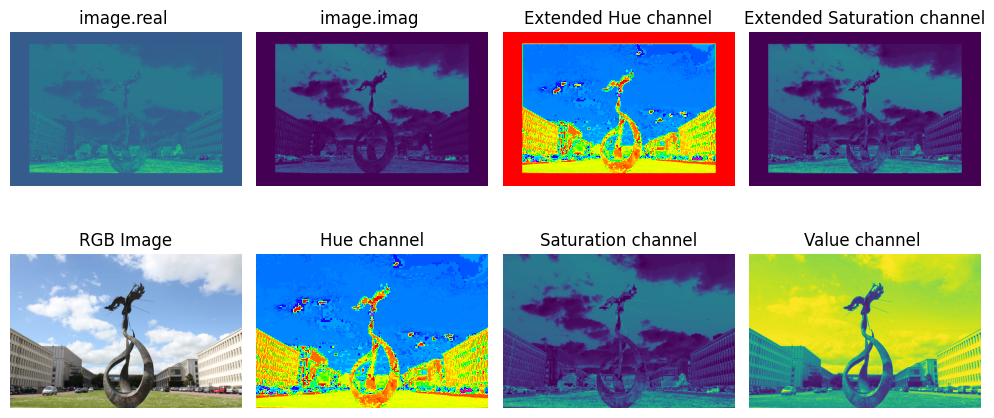

In [79]:
fig, ((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax13)) = plt.subplots(nrows = 2, ncols=4, figsize=(10,5))

ax00.imshow(image.real) 
ax00.set_title("image.real ")
ax00.axis('off')
ax01.imshow(image.imag) 
ax01.set_title("image.imag ")
ax01.axis('off')
ax02.imshow(H_ext, cmap='hsv')
ax02.set_title("Extended Hue channel")
ax02.axis('off')
ax03.imshow(S_ext)
ax03.set_title("Extended Saturation channel")
ax03.axis('off')

ax10.imshow(rgb_img)
ax10.set_title("RGB Image")
ax10.axis('off')
ax11.imshow(H, cmap='hsv')
ax11.set_title("Hue channel")
ax11.axis('off')
ax12.imshow(S)
ax12.set_title("Saturation channel")
ax12.axis('off')
ax13.imshow(V) 
ax13.set_title("Value channel ")
ax13.axis('off')


fig.tight_layout()

In [80]:
#img = rgb_img #image.imag
from PIL import Image

#img = Image.open('/your image path/image.jpg') # image extension *.png,*.jpg
#new_width  = 16
#new_height = 16
im = image.imag
'''
(width, height) = im.shape
top = height / 4
right = 164
bottom = 3 * height / 4
'''
#img.save('output image name.png') # format may what you want *.png, *jpg, *.gif

# Cropped image of above dimension
# (It will not change original image)
#im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
from numpy.fft import fftn, ifftn, fftshift, ifftshift

(Nx, Ny) = 4, 4
n = Nx * Ny
(rx, ry) = 1., 1.
(Qx, Qy) = int(rx * Nx), int(ry * Ny)
m = Qx * Qy

A = (1 + 1j)*np.zeros((m,n))
for k in range(n):
    j = int( k%Ny )
    i = int( (k-j)/ Ny )
    E = np.zeros((Nx,Ny))
    E[i,j] = 1. 
    #print(np.linalg.norm(E))
    A[0:m,k] = fftn(E, s = (Qx,Qy), norm = 'ortho').flatten()

#np.linalg.det(A)
#print(np.linalg.norm(A[:,0]))
print(A)
x = (1 + 0j)*np.random.normal(2, 1, size = (n,)) + (0 + 1j)*np.random.normal(2, 1, size = (n,))
print(np.linalg.norm(x))
z = A @ np.conj(x)
print(np.linalg.norm(z))

[[ 0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j
   0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j
   0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j  ]
 [ 0.25+0.j    0.  -0.25j -0.25+0.j    0.  +0.25j  0.25+0.j    0.  -0.25j
  -0.25+0.j    0.  +0.25j  0.25+0.j    0.  -0.25j -0.25+0.j    0.  +0.25j
   0.25+0.j    0.  -0.25j -0.25+0.j    0.  +0.25j]
 [ 0.25+0.j   -0.25+0.j    0.25+0.j   -0.25+0.j    0.25+0.j   -0.25+0.j
   0.25+0.j   -0.25+0.j    0.25+0.j   -0.25+0.j    0.25+0.j   -0.25+0.j
   0.25+0.j   -0.25+0.j    0.25+0.j   -0.25+0.j  ]
 [ 0.25+0.j    0.  +0.25j -0.25+0.j    0.  -0.25j  0.25+0.j    0.  +0.25j
  -0.25+0.j    0.  -0.25j  0.25+0.j    0.  +0.25j -0.25+0.j    0.  -0.25j
   0.25+0.j    0.  +0.25j -0.25+0.j    0.  -0.25j]
 [ 0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j    0.  -0.25j  0.  -0.25j
   0.  -0.25j  0.  -0.25j -0.25+0.j   -0.25+0.j   -0.25+0.j   -0.25+0.j
   0.  +0.25j  0.  +0.25j  0.  +0.25j  0.  +0.25j]
 [ 0.25+0.j    

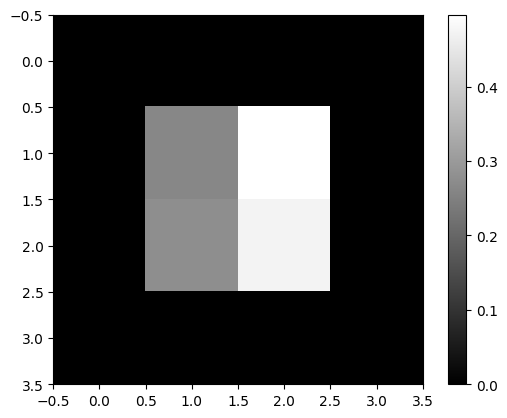

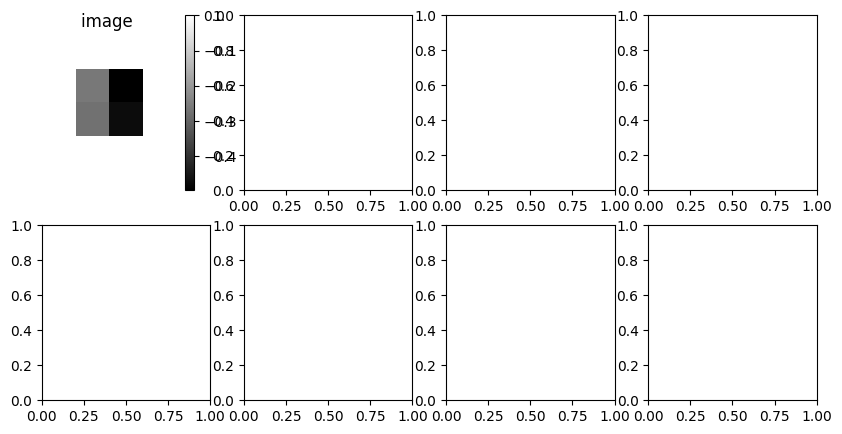

In [81]:

NumPix = 0 + np.floor(0.5 * (1-2**(-1)) *Nx)
bord = NumPix/Nx
#x_true = im[500:516, 500:516]
mask = (0 + 0j) * np.zeros((Nx,Ny))
mask[int(bord * Nx):int((1-bord)*Nx),int(bord * Ny):int((1-bord)*Ny)] = ((1)*1 + (0) *1j) * np.ones((int((1-2*bord)*Nx),int((1-2*bord)*Ny)))
x_true = (0 + 0j) * np.zeros((Nx,Ny))

i, k = np.meshgrid(np.arange(int(Nx/2)), np.arange(int(Ny/2)))
#omega = np.exp( - 2 * np.pi * 1j /int(Nx/2) * int(Ny/2) ) # (i + k *0j) *  #i+k**2-k*i   #k + i**2 - i*k
grd_truths = []
x_true[int(bord * Nx):int((1-bord)*Nx),int(bord * Ny):int((1-bord)*Ny)] = ((1)*1 + (1) *1j) * np.ones((int((1-2*bord)*Nx),int((1-2*bord)*Ny))) #(7 + 0j)* np.random.normal(0, 1, size = (int(Nx/2),int(Ny/2))) + (0 + 5j)* np.random.normal(0, 1, size = (int(Nx/2),int(Ny/2))) #(i + k *1j) * np.ones((int(Nx/2),int(Ny/2)))
x_true = x_true / np.max(np.abs(x_true))
grd_truths.append(x_true)
#x_true[1,1] = 2 + 1j
#print(x_true)
#x_true[0, 1:Ny-1] = np.ones((1,Ny-2))
img = Image.open('ISIC_0000004_cancer.jpg')
#img = iio.v2.imread('ISIC_0000004_cancer.jpg')
#x_true = Image.rgb2gray(img)
x_true3 = np.array( img.resize((Nx, Ny)))
#x_true = x_true/np.max(np.abs(x_true))
x_true = x_true3[:, :,0] + (1j) * x_true3[:, :,2]# np.zeros((Nx,Ny))
x_true = x_true / np.max(np.abs(x_true))
x_true *= mask 
grd_truths.append(x_true)
#x_true *= mask 
img.save('resized_image.jpg')
#print(x_true[0])
#print(np.shape(x_true))
#x_true = img
#plt.imshow(img)
img = ski.img_as_float(ski.data.camera())
img_res = ski.transform.resize(img, (Nx, Ny))
x_true = 2. * img_res + 2.j * (- img_res)
x_true = x_true / np.max(np.abs(x_true))

#x_true = (1 + 1j) * np.ones(x_true.shape)
x_true *= mask 
grd_truths.append(x_true)
plt.imshow(x_true.real, cmap='gray')
plt.colorbar()

x_true_real = np.real(x_true)#.reshape((Nx, Ny))
x_true_imag = np.imag(x_true)#.reshape((Nx, Ny))
#print(x_true_real)
#x_true = x_true_real
fig, ((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax13)) = plt.subplots(nrows = 2, ncols=4, figsize=(10,5))

im = ax00.imshow(x_true_imag, cmap='gray') 
ax00.set_title("image ")
ax00.axis('off')
plt.colorbar(im, ax = ax00)

##plt.imshow(-1j * x_true)
#plt.colorbar()

In [82]:
from numpy.fft import fftn, ifftn, fftshift, ifftshift
#from scipy.fft import ifftn 

sensingModel = "iid stdd Gauss dist"
sensingModel = "Fourier Matrix"

if sensingModel == "iid stdd Gauss dist":
    A = (1. + 0j) * np.random.normal(0,1, size = (m,n)) + (0. + 0j) * np.random.normal(0,1, size = (m,n)) # i.i.d. std Gaussian 
    A = (1. + 0j)*np.eye(n)

if sensingModel == "Fourier Matrix":
    
    def DFT_matrix(N):
        i, j = np.meshgrid(np.arange(N), np.arange(N))
        omega = np.exp( - 2 * np.pi * 1j / N )
        W = np.power( omega, i * j ) / np.sqrt(N)  
        return W
    
    def dft_matrix(N):
        w = np.exp((-2 * np.pi * 1j) / N)  # remove the '-' for inverse fourier
        r = np.arange(N)
        w_matrix = np.vander(w ** r, increasing=True)  # faster than meshgrid
        return w_matrix / np.sqrt(N)
    #'''
    def dftmtx(N):
        A = fftn(np.eye(N), axes = (1,) , norm = 'ortho') #wrong: this compute FT of 1D array and not 2D images
        #A /= np.sqrt(N)
        return A
    #'''
    #Nx, Ny = 2, 2
    #n = Nx*Ny
    #m = n
    #A = dftmtx(n)

#print(DFT_matrix(2))
#print(dft_matrix(2))
#print(dftmtx(4).T)

In [83]:
'''
def Fourier_vect(x):
    return fftn(x.reshape(Nx, Ny), norm = 'ortho').flatten()

t = np.array([1, 0, 0, 0])
print(np.linalg.norm(Fourier_vect(t) - A @ t))
'''


"\ndef Fourier_vect(x):\n    return fftn(x.reshape(Nx, Ny), norm = 'ortho').flatten()\n\nt = np.array([1, 0, 0, 0])\nprint(np.linalg.norm(Fourier_vect(t) - A @ t))\n"

In [84]:
'''
print('A', A)
print(' A @ t', A @ t)
print('Fourier_vect(t)', Fourier_vect(t))
print('t.reshape', t.reshape(Nx, Ny))
'''

"\nprint('A', A)\nprint(' A @ t', A @ t)\nprint('Fourier_vect(t)', Fourier_vect(t))\nprint('t.reshape', t.reshape(Nx, Ny))\n"

x_true_vect [0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.26284848-0.26284848j
 0.49659923-0.49659923j 0.        +0.j         0.        +0.j
 0.27656949-0.27656949j 0.47162016-0.47162016j 0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j        ]
z [ 0.37690934+0.37690934j -0.10720035-0.37690934j  0.10720035+0.10720035j
 -0.37690934-0.10720035j  0.00281452-0.37690934j -0.14109926+0.2454851j
  0.00967502-0.10720035j  0.12860973+0.23862459j -0.00281452-0.00281452j
  0.00967502+0.00281452j -0.00967502-0.00967502j  0.00281452+0.00967502j
 -0.37690934+0.00281452j  0.23862459+0.12860973j -0.10720035+0.00967502j
  0.2454851 -0.14109926j]
meas [2.84143442e-01+0.j 1.53568733e-01+0.j 2.29845844e-02+0.j
 1.53563295e-01+0.j 1.42071346e-01+0.j 8.01730778e-02+0.j
 1.15855691e-02+0.j 7.34882786e-02+0.j 2.06664571e-05+0.j
 1.07107314e-04+0.j 1.96003523e-04+0.j 1.11629035e-04+0.j
 1.42070943e-01+

(1.0000813515584657+0j)

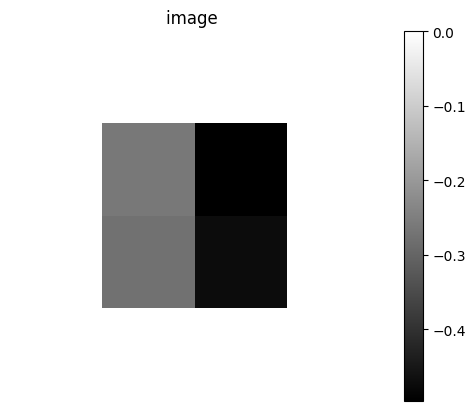

In [85]:
noise = (1. + 0.j) * np.random.normal(0, 1, size = (m,))
noise = (0.0001/ np.linalg.norm(noise)**2) * np.abs(noise)**2
#noise /= np.max(noise) 

#x_true = (1 + 1j) * np.ones(x_true.shape)
#x_true *= mask
im = plt.imshow(x_true.imag, cmap='gray') 
plt.title("image ")
plt.axis('off')
plt.colorbar()

x_true_vect = x_true.reshape(n,)
print("x_true_vect", x_true_vect)
from numpy.fft import fftn, ifftn, fftshift, ifftshift, ifft2
def operator(x):
    z = A @  np.conjugate(x)
    print("z", z)
    #invFou = (np.conjugate(A.T) @ (z)).reshape(Nx, Ny) #ifft2(z.reshape(Nx, Ny)) #np.linalg.inv
    #plt.imshow(invFou.real)

    #plt.imshow(np.abs(z.reshape((Nx,Ny))))

    #plt.show()
    return z * np.conjugate(z)

meas = operator(x_true_vect) + noise #* (noise * np.conjugate(noise))**(0.5)
print("meas", meas )
test = np.sum(meas)/(np.linalg.norm(x_true_vect)**2)
test

In [86]:
#print(A[0], x_true_vect, noise, np.dot(noise, noise), meas)
#print(meas)
#operator(x_true_vect)

In [87]:
'''
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(121)

trueIm = ax.imshow(x_true)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(trueIm, cax=cax, orientation='vertical')
ax.set_title('True Image')
'''

"\nfig = plt.figure(figsize = (16, 6))\nax = fig.add_subplot(121)\n\ntrueIm = ax.imshow(x_true)\ndivider = make_axes_locatable(ax)\ncax = divider.append_axes('right', size='5%', pad=0.05)\nfig.colorbar(trueIm, cax=cax, orientation='vertical')\nax.set_title('True Image')\n"

In [88]:
import numdifftools as nd
algo = 'complex mirror'
#algo = 'FIENUP'
if algo == 'real mirror' or algo == 'FIENUP' : a, b = 1, 0
if algo == 'complex mirror': a, b = 0, 1

In [89]:
def psi(x):
    return 0.25 *(a * np.linalg.norm(x)**4 + b * ((np.linalg.norm(x.real)**4 + np.linalg.norm(x.imag)**4))) + 0.5 *  np.linalg.norm(x)**2
def grad_psi_num(x):#numerical real derivative
    return nd.Gradient(psi)(x)
def grad_psi_(x):#real derivative _real
    return (np.linalg.norm(x)**2 + 1) * x
#'''
def grad_psi(z):#Wirtinger derivative
    return 1 * (a * np.linalg.norm(z)**2 + 1) * z + b * ( ((np.linalg.norm(z.real))**2)*z.real + ((np.linalg.norm(z.imag))**2)*z.imag * 1j ) #np.conjugate(z)
#'''
def breg_psi(x, u):
    return psi(x) - psi(u) - np.vdot(grad_psi(u), x-u)

def f_old(x): # f in slow loop form 
    s = 0
    for r in range(m):
        s += (meas[r] - np.dot(A[r], x)**2 )**2 
    return s/(4*m)
def f(x): # f in fast matrix form
    s = np.linalg.norm(meas- operator(x) )**2 
    return (s/4/m)
def grad_f_num(x): #numerical real derivative
    return nd.Gradient(f)(x)
def grad_f_ (x): #real derivative, fast matrix form _real
    z = A @ x
    a = A.T @ ( z*( z**2 - meas))
    return a / m
def grad_f_true_real(x): #real derivative, slow loop form 
    s = 0
    for r in range(m):
        s +=  ( np.linalg.norm(np.dot(A[r], x))**2 - meas[r]) * np.conjugate(A[r]) * np.dot(A[r], x)
    return s / m

def grad_f_wrong(x): #Wirtinger derivative, fast matrix form #theirs  #_wrong
    z = np.conjugate(A) @ x
    a = A.T @ ( z*( z * np.conjugate(z) - meas))
    return a / (1*m)

def grad_f_mieux(x): #Wirtinger derivative, fast matrix form #theirs
    z = A @ np.conjugate(x)
    y = A @ x
    a = np.conjugate(A).T @ ( y*( z * np.conjugate(z) - meas))
    return a / (1*m)
def grad_f1(x): #Wirtinger derivative, fast matrix form #theirs
    z = A @ (x)
    y = np.conjugate(A) @ x
    a = (A).T @ ( y*( z * np.conjugate(z) - meas))
    return a / (1*m)
#'''
def grad_f(x): #Wirtinger derivative, fast matrix form #theirs _new
    z = A @ np.conjugate(x)
    y = np.conjugate(A) @ x
    a = (A).T @ ( y*( z * np.conjugate(z) - meas))
    return a / (1*m)
#'''
def grad_f_ours(x): #Wirtinger derivative, fast matrix form
    z = A @ x
    a = np.conjugate(A).T @ ( z*( z * np.conjugate(z) - meas))
    return a / (1*m)

def grad_f_true_compl(x): #Wirtinger derivative, slow loop form
    s = 0
    for r in range(m):
        s +=  ( np.linalg.norm(np.dot(A[r], x))**2 - meas[r]) * A[r] * np.dot(np.conjugate(A[r]), x)
    return s / (1*m)
def see1(x): #Wirtinger derivative, slow loop form
    s = 0
    for r in range(m):
        s +=  ( np.linalg.norm(np.dot(A[r], x))**2 - meas[r]) * (A[r].reshape((n,1)) @ (np.conjugate(A[r]).reshape((1,n)))) @ x
    return s / (1*m)
def see(x): #Wirtinger derivative, slow loop form
    s = 0
    for r in range(m):
        s +=  ( np.linalg.norm(np.vdot(A[r], x))**2 - meas[r]) * (A[r].reshape((n,1)) @ (np.conjugate(A[r]).reshape((1,n)))) @ x
    return s / (1*m)
'''
def grad_f_true_compl_flow(x): #Wirtinger flow, slow loop form
    s = 0
    for r in range(m):
        s +=  ( np.linalg.norm(np.dot(A[r], x))**2 - meas[r]) * np.conjugate(A[r]) * np.dot(A[r], x)
    return s / (2*m)
'''
def breg_f(x, u):
    return f(x) - f(u) - np.vdot(grad_f(u), x-u) 
#'''
x = (1 + 0j)*np.random.normal(2, 1, size = (n,)) + (0 + 1j)*np.random.normal(2, 1, size = (n,))
y = (1 + 0j)*np.random.normal(2, 1, size = (n,)) + (0 + 0j)*np.random.normal(2, 1, size = (n,))
#x = np.array([1 + 2j, 2 + 4j])
#y = 2 *x
x = (1 + 2j)*np.ones(x_true_vect.shape)
print('here', grad_psi( x_true_vect))
print('see', breg_f (2 * x, x))
#print(breg_f(y,x))
print(np.vdot(grad_f(x), y))
#print('look', np.linalg.norm(grad_psi(x)  - grad_psi_num(x)))
print('look', np.linalg.norm(grad_f(x)  - grad_f_num(x)))
print(np.linalg.norm(grad_f_true_compl(x)  - see1(x)))
print(np.linalg.norm(grad_f(x)-see(x)))
#print(grad_f(x), see(x))

print((x_true_vect))
#'''

here [0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.42439946-0.42439946j
 0.80181725-0.80181725j 0.        +0.j         0.        +0.j
 0.44655363-0.44655363j 0.76148563-0.76148563j 0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j        ]
z [8.-16.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
z [4.-8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
see (1099.2896413946899+0j)
(165.82091668129658-331.64183336259316j)
z [4.-8.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
z [4.68740809-8.j 0.68740809+0.j 0.68740809+0.j 0.68740809+0.j
 0.68740809+0.j 0.68740809+0.j 0.68740809+0.j 0.68740809+0.j
 0.68740809+0.j 0.68740809+0.j 0.68740809+0.j 0.68740809+0.j
 0.68740809+0.j 0.68740809+0.j 

In [90]:
np.linalg.norm(A, axis = -1).shape

(16,)

In [91]:
def smoothnessPara_L_old(A, noise):
    m = A.shape[0]
    L = 0.
    for r in range(m):
        L += np.vdot( A[r, :], A[r, :]) * (3*np.vdot( A[r, :], A[r, :]) + np.max(noise))
    return L/m

def smoothnessPara_L(A, noise):

    z = np.linalg.norm(A, axis = -1)**2
    L = np.mean( z * ( 3*z + np.max(noise)))
    return L

#print(smoothnessPara_L_old(A, noise) - smoothnessPara_L(A, noise))

In [92]:
#x, Val, Vec = spectInit(meas, A)
#print("x", x, "eigenvalues,", Val, "eigenvectors", Vec)

In [93]:
def grad_psi_star(z):
  b = np.linalg.norm(z)
  a = b**2
  print('a', a)
  
  if a == 0.:
    return z
  else: 
    '''
    c = b**3 * (3*(27*a+4))**(0.5) + 9* (a**2)
    t = (2 * c**2)**(1/3) - 2 * a * (3**(1/3))
    t /= a * ((36 * c)**(1/3))
    '''      
    p = [a, 0., 1., -1.]
    #print(p)
    t = np.roots(p)
    t = t.real[abs(t.imag) == 0. ][0]
    print('t', t)
    #import pdb
    #pdb.set_trace()
    return  t*z

In [94]:
beta = .7
def P_S(x):
    return x * mask.reshape((n,))
def P_M (x):
    X = A @ np.conjugate(x)
    X = (meas**(0.5)) * np.exp(1j* np.angle(X))
    return np.conjugate(A.T) @ (X)
gamma_M = -1/beta
def R_M(x):
    return (1+gamma_M)*P_M(x) - gamma_M*x
gamma_S = 1/beta
def R_S(x):
    return (1+gamma_S)*P_S(x) - gamma_S*x



In [95]:
#x, Val, Vec = spectInit(meas, A)

x = ((1. + 0.j)*np.random.normal(0, 1, size = (n, ) ))+(0. + 1.j)*np.random.normal(0, 1, size = (n, ) ) #np.random.uniform
guessNoise  = ((1. + 0.j)*np.random.normal(0, 1, size = x_true_vect.shape) +  (0. + 0.j)* np.random.normal(0, 1, size = x_true_vect.shape))
x = x_true_vect  + (1./(1. * np.linalg.norm(guessNoise)))*guessNoise
#x = np.ones(n)
#x = x =  (2 + 3j) *np.ones(x_true_vect.shape)
x = x * mask.reshape((n,))
#x = (np.sum(meas)**(0.5)/np.linalg.norm(x)) * x

mag = np.linalg.norm(x)**2

In [96]:
def mirrorDescent(L, kappa, xi, algo, x):
    iterates = []

    iterates.append(x)

    if algo == 'real mirror' or 'complex mirror':
        if algo == 'real mirror': a, b = 1, 0
        if algo == 'complex mirror': a, b = 0, 1
        for k in range(maxiter):
            j = 0
            while  True:   
                L /= xi
                gamma = (1-kappa)/(L)#*mag 
                #print(gamma)
                x = iterates[k]
                z = grad_psi(x) - gamma * grad_f(x)
                x_temp  = 0 * grad_psi_star(z) + 1 * ( grad_psi_star(z.real) +  grad_psi_star(z.imag) * 1j ) #grad_psi_star(z)
                '''
                print('iterate x: ', iterates[k], 'x_temp ', x_temp )
                print(f"A: {(breg_f(x_temp, iterates[k]))} B: { (L * breg_psi(x_temp, iterates[k]))}")
                print('while loop', j, "L", L, "gap", breg_f(x_temp, iterates[k]) - L * breg_psi(x_temp, iterates[k]))
                '''
                if (breg_f(x_temp, iterates[k])) >  (L  * breg_psi(x_temp, iterates[k])):
                    #print(f"A: {breg_f(x_temp, iterates[k])} B: { L * breg_psi(x_temp, iterates[k])}")
                    #print("hi")               
                    L *= xi
                    gamma = (1-kappa)/L 
                    x = iterates[k]
                    z = grad_psi(x) - gamma * grad_f(x)
                    x = 0 * grad_psi_star(z) + 1 * ( grad_psi_star(z.real) +  grad_psi_star(z.imag) * 1j )
                    x = x * mask.reshape((n,))
                    #x = (np.sum(meas)**(0.5)/np.linalg.norm(x)) * x 
                    '''
                    X = A @ np.conjugate(x)
                    X = (meas**(0.5)) * np.exp(1j* np.angle(X))               #/(np.abs(X))) * X
                    x = np.conjugate(A.T) @ (X)
                    '''
                    iterates.append(x)
                    L *= (xi**j) # else L gets smaller than needed and the step size gets inappropiately large, 
                                 #sothat we get pulled away from the actual true minimum and the error jumps high again
                    break  
                #print("ho")
                j += 1 
                #if j % 10 == 0:
            '''    
            if f(x)  < f(iterates[k]) :
                iterates.append(x)
            else:
                break   
            '''            


            '''
                if j > 1:
                    print('while loop', j, "L", L, "gap", breg_f(x_temp, iterates[k]) - L * breg_psi(x_temp, iterates[k]))
                
                if j> 20:
                    break
                '''
                    
            if k % 1 == 0:
            
               print('iterate', k+1)
    if algo == 'FIENUP':
        for k in range(maxiter):
            #x = x + beta * (P_S(R_M(x)) - P_M(R_S(x)))
            #'''
            X = A @ np.conjugate(x)
            X = (meas**(0.5)) * np.exp(1j* np.angle(X))               #/(np.abs(X))) * X
            x = np.conjugate(A.T) @ (X)
            x = P_S(x)
            #x = (np.sum(meas)**(0.5)/np.linalg.norm(x)) * x #Normalising with Parseval will make us reconstruct the noise
            #'''                                             #But for noiseless measurements, it does help getting the right scale
            iterates.append(x)
            if k % 10: 
                print('iteration k', k)
        
    if algo == 'stable':
        for k in range(maxiter):
            j = 0

            x_temp = x
            while  True:   
                
                gamma = (1-kappa)/L 

                z = grad_psi(x) - gamma * grad_f(x)
                x_prev = x_temp
                
                x_temp  = grad_psi_star(z)


                print(np.linalg.norm(x_prev-x_temp))
                L /= xi

                print(f"A: {breg_f(x_temp, iterates[k])} B: {xi * L * breg_psi(x_temp, iterates[k])} C: {breg_psi(x_temp, iterates[k])}")
                    
                if breg_f(x_temp, iterates[k]) <= xi * L  * breg_psi(x_temp, iterates[k]):
                    print(f"A: {breg_f(x_temp, iterates[k])} B: {xi * L * breg_psi(x_temp, iterates[k])}")
                    #print("hi")
                    x = x_temp
                    L *= xi
                    break
                
                #print("ho")
                j += 1 
                #if j % 10 == 0:
                print('while loop', j, "L", L, "gap", breg_f(x_temp, iterates[k]) - xi * L * breg_psi(x_temp, iterates[k]))
        
           
            
            iterates.append(x)
            
            if k % 2 == 0:
            
               print('iterate', k+1)

    if algo == 'none':
        for k in range(maxiter):
            j = 0

            while  True:   
                L /= xi
                gamma = (1-kappa)/L 

                z = grad_psi(x) - gamma * grad_f(x)
                x_temp  = grad_psi_star(z)

                
                if breg_f(x_temp, iterates[k]) <= xi * L  * breg_psi(x_temp, iterates[k]):
                    print(f"A: {breg_f(x_temp, iterates[k])} B: {xi * L * breg_psi(x_temp, iterates[k])}")
                    #print("hi")
                    x = x_temp
                    break
                
                #print("ho")
                j += 1 
                #if j % 10 == 0:
                print('while loop', j, "L", L, "gap", breg_f(x_temp, iterates[k]) - xi * L * breg_psi(x_temp, iterates[k]))
        
            L *= xi
            
            iterates.append(x)
            
            if k % 2 == 0:
            
               print('iterate', k+1)        

    return iterates

In [97]:
maxiter = 100

L = 1 * smoothnessPara_L(A, noise)
#print("L", L)

kappa  = 0.9

#algo = 'stable'
#xi = 0.1

xi = 12
#algo = 'none'
x_sols = mirrorDescent(L, kappa, xi, algo, x)

a 4.832432923395863
t 0.476657746302772
a 3.2317088191674235
t 0.5269991363020705
a 1.6007241042284386
t 0.6194735689177309
z [ 0.1894367 +0.37761001j -0.16457446-0.13229898j  0.40823242+0.10696467j
 -0.43299843-0.35127304j  0.02472074-0.21133854j  0.08195836+0.16825304j
 -0.12462186-0.27435602j  0.01820791+0.31744344j  0.14121417-0.00281424j
 -0.04584564-0.08571306j -0.04268625-0.00967681j -0.05270419+0.09819893j
 -0.35506287-0.16312579j  0.12836226+0.04977509j -0.2413831 +0.17693317j
  0.46752902-0.06358608j]
z [ 0.18906643+0.37690934j -0.1641002 -0.13216658j  0.40884296+0.10720035j
 -0.43380919-0.35194311j  0.02474245-0.21099437j  0.08171556+0.16805785j
 -0.12465208-0.27451586j  0.01819406+0.31745238j  0.14117252-0.00281452j
 -0.04582429-0.08567321j -0.04266343-0.00967502j -0.05268479+0.09816274j
 -0.3549814 -0.16310046j  0.12820893+0.04978194j -0.24152745+0.17699053j
  0.46829992-0.06367201j]
a 4.735287795276121
t 0.4791364373586641
a 3.151079738596389
t 0.5302397576561327
a 1.5842

z [ 0.18906643+0.37690934j -0.1641002 -0.13216658j  0.40884296+0.10720035j
 -0.43380919-0.35194311j  0.02474245-0.21099437j  0.08171556+0.16805785j
 -0.12465208-0.27451586j  0.01819406+0.31745238j  0.14117252-0.00281452j
 -0.04582429-0.08567321j -0.04266343-0.00967502j -0.05268479+0.09816274j
 -0.3549814 -0.16310046j  0.12820893+0.04978194j -0.24152745+0.17699053j
  0.46829992-0.06367201j]
z [ 0.19193758+0.37533664j -0.1641968 -0.13565219j  0.40388125+0.10791141j
 -0.43162203-0.34759586j  0.02258952-0.21239485j  0.08037179+0.17017483j
 -0.12259181-0.27313615j  0.01963049+0.31535616j  0.14035227-0.00213226j
 -0.04584915-0.08634982j -0.04263293-0.0081533j  -0.05187019+0.09663538j
 -0.35487937-0.16080954j  0.12967416+0.05182718j -0.23865652+0.17337804j
  0.46386173-0.06439568j]
z [ 0.19481445+0.37387035j -0.16428983-0.13914482j  0.39901536+0.10862019j
 -0.42953998-0.34334573j  0.02048523-0.21385083j  0.07899337+0.17228949j
 -0.12055471-0.27176808j  0.02107612+0.31332943j  0.13953429-0.001

c:\Users\sefojere\AppData\Local\miniconda3\envs\firstenv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


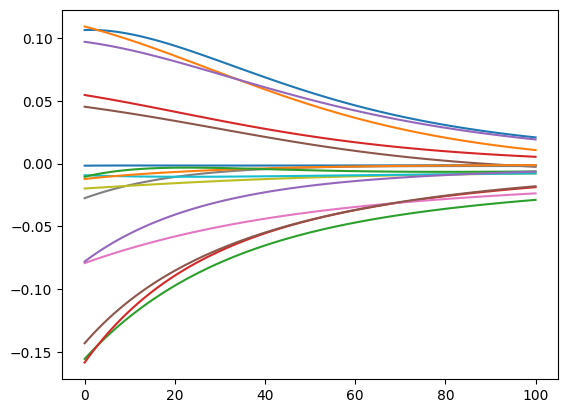

In [98]:
x_sols_imag = np.imag(x_sols)
x_sols_real = np.real(x_sols)

f_x_sols  = [f(x) for x in x_sols]
plt.plot(np.arange(maxiter+1), [meas - operator(x) for x in x_sols])#plt.plot(np.arange(maxiter+1), [meas_test - operator(x) for x in x_sols])


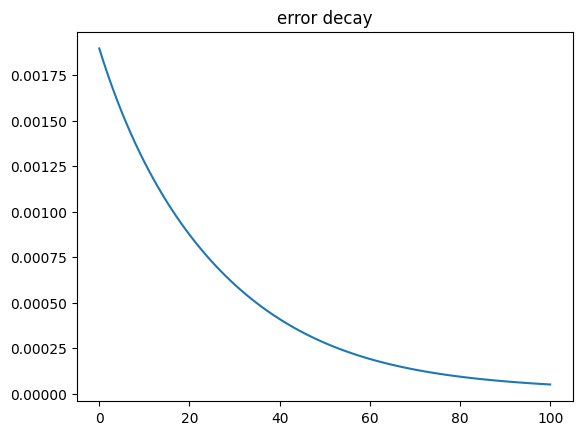

In [99]:
K = np.arange(len(f_x_sols))
plt.plot(K, f_x_sols)
plt.title('error decay')
plt.show()

In [100]:
x_sols = x_sols_real
#x_sols = x_sols_imag

check = x_sols.T

x_true = x_true_real
#x_true = x_true_imag


x_true_vect_test = x_true.reshape(n,)
meas_test = operator(x_true_vect_test) + noise # (noise * np.conjugate(noise))**(0.5)
'''
def f_test(x): # f in fast matrix form
    s = np.linalg.norm(meas_test- operator(x) )**2 
    return (s/4/m)

#print(f_test(x_true_vect_test))
#check_magnitude =  np.array([meas_test- operator(x) for x in x_sols]).T
'''
NIter = len(f_x_sols)



z [ 0.37690934+0.j         -0.24205485-0.13485449j  0.10720035+0.j
 -0.24205485+0.13485449j -0.18704741-0.18986193j  0.05219292+0.19329218j
 -0.04876267-0.05843769j  0.18361716+0.05500743j -0.00281452+0.j
  0.00624477-0.00343025j -0.00967502+0.j          0.00624477+0.00343025j
 -0.18704741+0.18986193j  0.18361716-0.05500743j -0.04876267+0.05843769j
  0.05219292-0.19329218j]


z [ 0.18906643+0.j         -0.2989547 +0.10988827j  0.40884296+0.j
 -0.2989547 -0.10988827j -0.16511947-0.02394696j  0.27500774+0.11586493j
 -0.18308976-0.2257532j   0.0732015 +0.13383522j  0.14117252+0.j
 -0.04925454-0.09191798j -0.04266343+0.j         -0.04925454+0.09191798j
 -0.16511947+0.02394696j  0.0732015 -0.13383522j -0.18308976+0.2257532j
  0.27500774-0.11586493j]
z [ 0.19193758+0.j         -0.29790942+0.10597184j  0.40388125+0.j
 -0.29790942-0.10597184j -0.16614493-0.02579266j  0.27211676+0.11728526j
 -0.18062416-0.22325709j  0.07465233+0.13176449j  0.14035227+0.j
 -0.04885967-0.0914926j  -0.04263293+0.j         -0.04885967+0.0914926j
 -0.16614493+0.02579266j  0.07465233-0.13176449j -0.18062416+0.22325709j
  0.27211676-0.11728526j]
z [ 0.19481445+0.j         -0.2969149 +0.10210045j  0.39901536+0.j
 -0.2969149 -0.10210045j -0.16717437-0.02764008j  0.26927482+0.11870381j
 -0.17821109-0.22080427j  0.07611064+0.12974054j  0.13953429+0.j
 -0.04847056-0.09106373j -0.04259317+0.j   

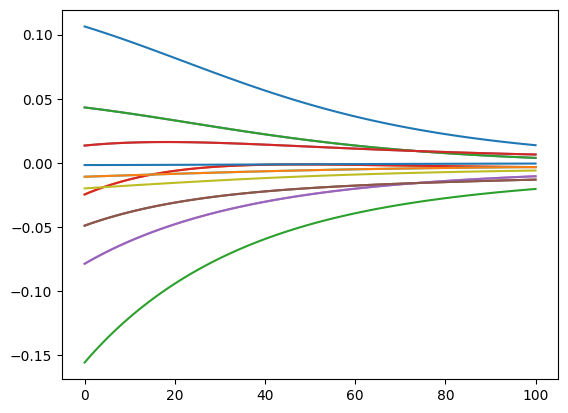

In [101]:

f_x_sols  = [f(x) for x in x_sols]
plt.plot(np.arange(maxiter+1), [meas_test - operator(x) for x in x_sols])#plt.plot(np.arange(maxiter+1), [meas_test - operator(x) for x in x_sols])

'\ncb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])\ncbar = fig.colorbar(retrievedImg, cax=cb_ax)\n'

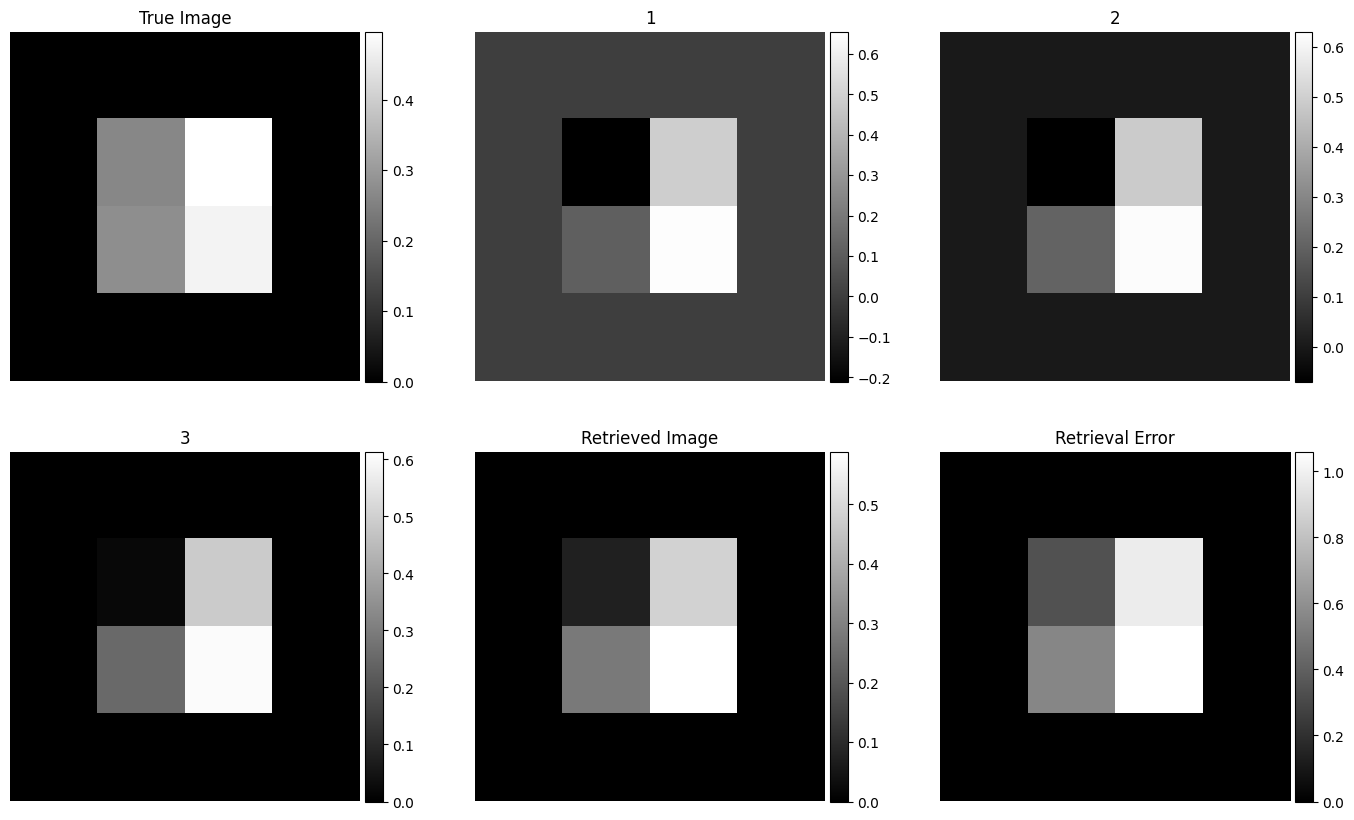

In [102]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(2, 3 , figsize=(17, 10))

ax0 = axes.flat[0]
ax0.set_axis_off()
trueIm = ax0.imshow(x_true, cmap='gray',vmin=np.min(x_true), vmax=np.max(x_true))
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(trueIm, cax=cax0, orientation='vertical')
ax0.set_title('True Image')

ax1 = axes.flat[1]
ax1.set_axis_off()
retrievedImg = ax1.imshow(x_sols[int(NIter/4)].reshape(Nx, Ny) , cmap='gray',vmin=min(x_sols[int(NIter/4)]), vmax=max(x_sols[int(NIter/5)]))
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax1, orientation='vertical')
ax1.set_title('1')

ax2 = axes.flat[2]
ax2.set_axis_off()
retrievedImg = ax2.imshow(x_sols[int(2 * NIter/4)].reshape(Nx, Ny) , cmap='gray',vmin=min(x_sols[int( 2* NIter/4)]), vmax=max(x_sols[int(2 * NIter/5)]))
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax2, orientation='vertical')
ax2.set_title('2')

ax3 = axes.flat[3]
ax3.set_axis_off()
retrievedImg = ax3.imshow(x_sols[int(3 * NIter/4)].reshape(Nx, Ny) , cmap='gray',vmin=min(x_sols[int(3 * NIter/4)]), vmax=max(x_sols[int(3 * NIter/5)]))
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax3, orientation='vertical')
ax3.set_title('3')
'''
ax4 = axes.flat[4]
ax4.set_axis_off()
retrievedImg = ax4.imshow(x_sols[int(4 * maxiter/5)].reshape(Nx, Ny) , cmap='viridis',vmin=min(x_sols[int(4 * maxiter/5)]), vmax=max(x_sols[int(4 * maxiter/5)]))
divider = make_axes_locatable(ax4)
cax4 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax4, orientation='vertical')
ax4.set_title('4')
'''
ax4 = axes.flat[4]
ax4.set_axis_off()
retrievedImg = ax4.imshow(x_sols[-1].reshape(Nx, Ny) , cmap='gray',vmin=min(x_sols[-1]), vmax=max(x_sols[-1]))
divider = make_axes_locatable(ax4)
cax4 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax4, orientation='vertical')
ax4.set_title('Retrieved Image')

error = x_true + x_sols[-1].reshape(Nx, Ny) # not a good measure since phase retrieval solutions are not unique
error_vect = error.reshape(n,)

ax5 = axes.flat[-1]
ax5.set_axis_off()
retrievedImg = ax5.imshow(error , cmap='gray',vmin=min(error_vect), vmax=max(error_vect))
divider = make_axes_locatable(ax5)
cax5 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(retrievedImg, cax=cax5, orientation='vertical')
ax5.set_title('Retrieval Error')

'''
cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(retrievedImg, cax=cb_ax)
'''